In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!unzip '/content/drive/My Drive/gender_dataset_face.zip'


Archive:  /content/drive/My Drive/gender_dataset_face.zip
   creating: gender_dataset_face/
   creating: gender_dataset_face/man/
  inflating: gender_dataset_face/man/face_570.jpg  
   creating: __MACOSX/
   creating: __MACOSX/gender_dataset_face/
   creating: __MACOSX/gender_dataset_face/man/
  inflating: __MACOSX/gender_dataset_face/man/._face_570.jpg  
  inflating: gender_dataset_face/man/face_1461.jpg  
  inflating: __MACOSX/gender_dataset_face/man/._face_1461.jpg  
  inflating: gender_dataset_face/man/face_1307.jpg  
  inflating: __MACOSX/gender_dataset_face/man/._face_1307.jpg  
  inflating: gender_dataset_face/man/face_216.jpg  
  inflating: __MACOSX/gender_dataset_face/man/._face_216.jpg  
  inflating: gender_dataset_face/man/face_1313.jpg  
  inflating: __MACOSX/gender_dataset_face/man/._face_1313.jpg  
  inflating: gender_dataset_face/man/face_202.jpg  
  inflating: __MACOSX/gender_dataset_face/man/._face_202.jpg  
  inflating: gender_dataset_face/man/face_564.jpg  
  inflati

In [4]:
import matplotlib.pyplot as plt
import cv2 
import matplotlib.pyplot as plt
import os
from google.colab.patches import cv2_imshow
import glob
import numpy.linalg as la
import imageio
import numpy as np # linear algebra
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import keras
from keras.models import Sequential, model_from_json, load_model
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import categorical_accuracy
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization
from keras import backend as K 

import matplotlib.pyplot as plt
from skimage import io
from skimage.transform import resize

Using TensorFlow backend.


In [0]:
X = []
Y = []
# read img from folder and assign with their corresponding label
for filename in glob.glob('/content/gender_dataset_face/man/*.jpg'):
    img = cv2.imread(filename)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_resize = resize(gray, (48, 48, 1))    
    X.append(gray_resize)
    # assign label, 1 for man, label[1] = 1
    label = [0,1]
    Y.append(label)
for filename in glob.glob('/content/gender_dataset_face/woman/*.jpg'):
    img = cv2.imread(filename)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_resize = resize(gray, (48, 48, 1))    
    X.append(gray_resize)
    # assign label, 0 for woman, label[0] = 1
    label = [1,0]
    Y.append(label)

X = np.array(X)
Y = np.array(Y)

# split training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

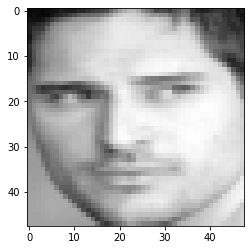

In [5]:
plt.imshow(X_train[0].squeeze(),cmap = 'gray')


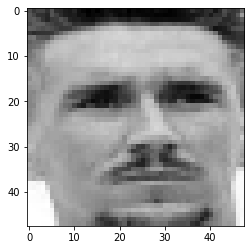

In [0]:
plt.imshow(X_train[1].squeeze(),cmap = 'gray')


In [7]:
# CNN model obtained from Mingjie, change last dense layer to 2
model = Sequential()
input_shape = (48,48,1)
model.add(Conv2D(64, (3, 3), input_shape=input_shape, activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(128, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

# flatten the model
model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# output layer, number of classes = 2
model.add(Dense(2, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer='adam')















Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1614 samples, validate on 693 samples
Epoch 1/30
1614/1614 [==============================] - 6s 4ms/step - loss: 0.8014 - acc: 0.6499 - val_loss: 1.7836 - val_acc: 0.6046

Epoch 00001: loss improved from inf to 0.80139, saving model to weights9.01-0.60.h5
Epoch 2/30
1614/1614 [==============================] - 1s 485us/step - loss: 0.6023 - acc: 0.7218 - val_loss: 0.7496 - val_acc: 0.7201

Epoch 00002: loss improved from 0.80139 to 0.60232, saving model to weights9.02-0.72.h5
Epoch 3/30
1614/1614 [==============================] - 1s 489us/step - loss: 0.5222 - acc: 0.7677 - val_loss: 0.4338 - val_acc: 0.7937

Epoch 00003: loss improved from 0.60232 to 0.52215, saving model to weights9.03-0.79.h5
Epoch 4/30
1614/1614 [==============================] - 1s 521us/step - loss: 0.4820 - acc: 0.7831 - val_loss: 0.3745 - val_acc: 0.8124

Epoch 00004: loss improved from 0.52215 to 0.48196,

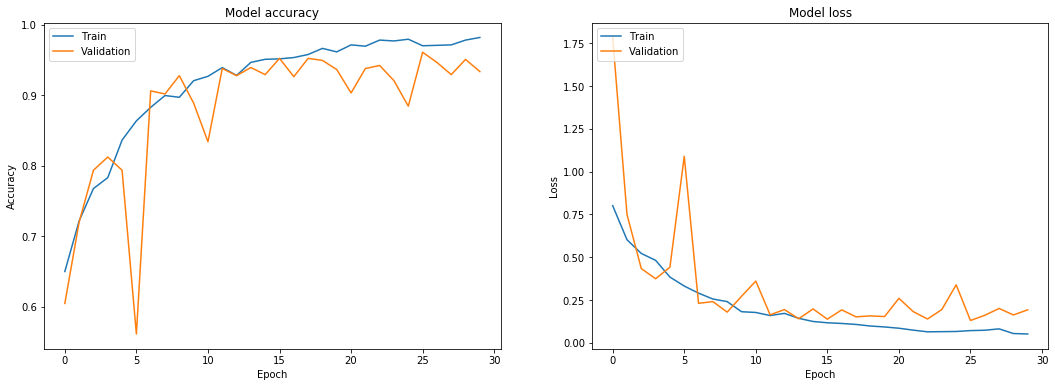

CNN Model Accuracy on test set: 0.9336


In [8]:
path_model='weights9.{epoch:02d}-{val_acc:.2f}.h5'
callbacks = ModelCheckpoint(filepath = path_model,monitor='loss', verbose=1, save_best_only=True,)
callback_list = [callbacks]
# set learning rate in optimizer
K.set_value(model.optimizer.lr,0.001)
epoch = 30
# fit the model
history = model.fit(x=X_train,     
            y=Y_train, 
            batch_size=64, 
            epochs=epoch, 
            verbose=1, 
            validation_data=(X_test, Y_test),
            shuffle=True,
            callbacks=callback_list
            )

# visualizing training process
fig, axes = plt.subplots(1,2, figsize=(18, 6))
# Plot training & validation accuracy values
axes[0].plot(history.history['acc'])
axes[0].plot(history.history['val_acc']) 
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper left')
plt.show()

# predict on test set and calculating accuracy
test_true = np.argmax(Y_test, axis=1)
test_pred = np.argmax(model.predict(X_test), axis=1)
print("CNN Model Accuracy on test set: {:.4f}".format(accuracy_score(test_true, test_pred)))

Predicted gender: woman


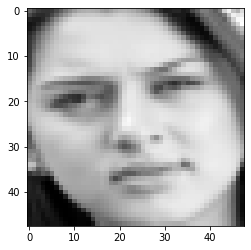

Predicted gender: woman


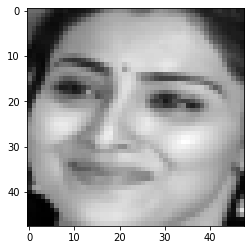

Predicted gender: woman


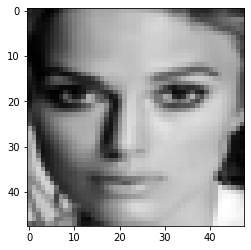

Predicted gender: man


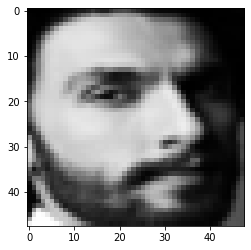

Predicted gender: woman


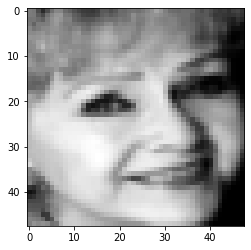

In [9]:
# test on test set
strat = 120
num = 5
pred = model.predict(X_test[strat:strat+num])
label_list = ['woman','man']
for i in range(num):
  plt.imshow(X_test[strat+i].squeeze(),cmap = 'gray')
  print("Predicted gender: {}".format(label_list[np.argmax(pred[i])]))
  plt.show()